In [2]:
import os
import time as timer

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

from torchvision import datasets
import torchvision.transforms as T

In [3]:
# Created modules
import visualization_utils as vu
import train_utils as tu
import model_utils as mu

import imp
imp.reload(mu)
imp.reload(tu)

<module 'train_utils' from '/Users/intanmaharani/Desktop/Semester I August 2022/IF5171 - Pembelajaran Mesin DSAI/Deep Learning/Praktikum_Mandiri/Project1/deliverables/train_utils.py'>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 0. Defining Costants and Helper Function

In [5]:
DATA_DIR = "../data"
MODEL_DIR = "models"

EPOCHS = 10
BATCH_SIZE = 64
LEARNING_RATE = 1e-3

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
## Create the directory to store the model if not exists
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

In [7]:
# Plotting Helper Function
def plot_acc_epoch(epochs, train_acc, test_acc):
    l = range(1,epochs+1)
    N = len(l)
    l2 = np.arange(N)
    plt.subplots(figsize=(10, 5))
    plt.plot(l2, test_acc, label="Testing Accuracy")
    plt.plot(l2, train_acc, label="Training Accuracy")
    plt.xticks(l2,l)
    plt.grid(True)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title('Accuracy versus Epoch MLP Model', fontsize=12)
    plt.show()

## 1. Dataset Preparation - SVHN for Training and MNIST for Testing

In [8]:
# Load dataset
training_data = datasets.SVHN(
    root=DATA_DIR,
    split='train',
    download=True,
    transform = T.Compose([
        T.Resize((28,28)),
        T.Grayscale(),
        T.ToTensor(),
        T.Normalize([0.5],[0.5])
    ])
)

test_data = datasets.MNIST(
    root=DATA_DIR, 
    train=False, 
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

Using downloaded and verified file: ../data/train_32x32.mat


In [9]:
type(training_data)

torchvision.datasets.svhn.SVHN

In [10]:
type(test_data)

torchvision.datasets.mnist.MNIST

In [11]:
# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)

In [13]:
# Check their dimensions
# MNIST
for i in train_dataloader:
    print(f"SVHN_train: {np.array(i[0]).shape}")
    break

# SVHN
for i in test_dataloader:
    print(f"MNIST_test: {np.array(i[0]).shape}")
    break

SVHN_train: (64, 1, 28, 28)
MNIST_test: (64, 1, 28, 28)


Show the MNIST and SVHN dataset

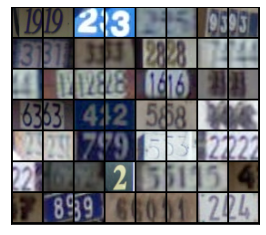

In [14]:
grid_tr = vu.set_grid(train_dataloader.dataset.data, num_cells=56)
vu.show(grid_tr)

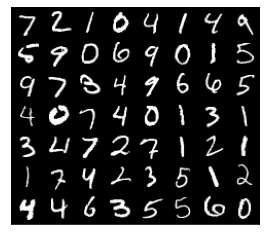

In [15]:
grid_ts = vu.set_grid(test_dataloader.dataset.data, num_cells=56)
vu.show(grid_ts)

In this case study, the training data and test data are from different domains - MNIST and SVHN datasets. Therefore, SVHN is transformed to grayscale so that it matched with the other domain - MNIST.

# 2. Modeling

The model that will be used is **MLP** or Multilayer Perceptron. MLP refers to ANN model that has more than 2 layers (i.e., hidden layer(s) in addition to input and output layers).

For the loss/objective function, **Cross Entropy Loss** will be used. This loss function is used mainly because in our training, model weights will be adjusted in every epoch.

For the optimizer, **Adam** will be used in the model development.

### 2.1. Create the model

In [17]:
print(f"Using {DEVICE} device")

# Define model
mlp = mu.MLP(d_in=28*28, d_out=10)
mlp = mlp.to(DEVICE)
print(mlp)

# Persistent file to store the model
model_path_adam = os.path.join(MODEL_DIR, "mlp_svhn_mnist_adam.pth")

Using cpu device
MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (network): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### 2.2. Define the loss function and the optimizers

In [18]:
# Loss function: Cross Entropy Loss or Log Loss
loss_fn = nn.CrossEntropyLoss()

In [20]:
# Optimizer 1: Stochastic Gradient Descent (SGD)
# optimizer1 = optim.SGD(
#     mlp.parameters(), 
#     lr=LEARNING_RATE
# )

In [19]:
# Optimizer 2: Adam
optimizer2 = optim.Adam(
    mlp.parameters(), 
    lr=LEARNING_RATE
)

### 2.3. Execute the training

with **10** epochs for each experiment, **64** batch size, and **0.001** learning rate

#### 2.3.1. Using Adam as optimizer

In [21]:
train_accuracy_adam = []
test_accuracy_adam = []
for t in range(EPOCHS):
    print(f"Epoch {t+1} out of {EPOCHS}\n ------------")
    
    start = timer.time()
    tu.train(train_dataloader, mlp, loss_fn, optimizer2)
    elapsed_time = timer.time() - start # this timing method ONLY works for CPU computation, not for GPU/cuda calls
    print(f" > Training time: {elapsed_time:>.2f} seconds")
    
    print("Test Set Error")
    acc_test = tu.test(test_dataloader, mlp, loss_fn)
    print("\nTrain Set Error")
    acc_train = tu.test(train_dataloader, mlp, loss_fn)
    test_accuracy_adam.append(acc_test)
    train_accuracy_adam.append(acc_train)
    
    # Save model
    torch.save(mlp.state_dict(), model_path_adam)
    print(f"Model {model_path_adam} stored!")
    
print("Done!")

Epoch 1 out of 10
 ------------
Loss: 2.296089 [    0]/73257
Loss: 1.554726 [ 6400]/73257
Loss: 1.431146 [12800]/73257
Loss: 1.054030 [19200]/73257
Loss: 1.229149 [25600]/73257
Loss: 1.429696 [32000]/73257
Loss: 0.923699 [38400]/73257
Loss: 1.194934 [44800]/73257
Loss: 1.149986 [51200]/73257
Loss: 0.829833 [57600]/73257
Loss: 0.792069 [64000]/73257
Loss: 0.925096 [70400]/73257
 > Training time: 46.84 seconds
Test Set Error
Test Error: 
 Accuracy: 39.8%, Avg loss: 2.497632 


Train Set Error
Test Error: 
 Accuracy: 72.1%, Avg loss: 0.884809 

Model models/mlp_svhn_mnist_adam.pth stored!
Epoch 2 out of 10
 ------------
Loss: 0.977779 [    0]/73257
Loss: 0.810262 [ 6400]/73257
Loss: 0.932708 [12800]/73257
Loss: 0.879135 [19200]/73257
Loss: 0.825704 [25600]/73257
Loss: 1.013951 [32000]/73257
Loss: 0.702680 [38400]/73257
Loss: 1.049288 [44800]/73257
Loss: 0.778382 [51200]/73257
Loss: 0.644326 [57600]/73257
Loss: 0.553920 [64000]/73257
Loss: 0.642240 [70400]/73257
 > Training time: 40.43 sec

##### 2.3.1.1. Plotting Training Accuracy vs Test Accuracy

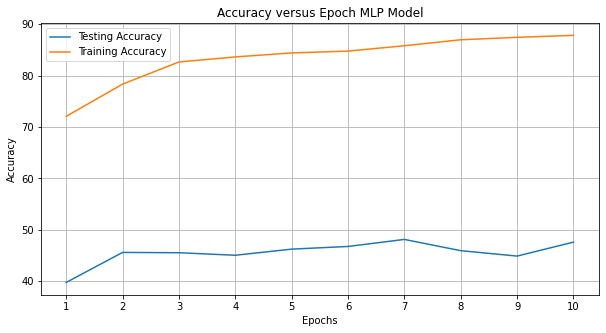

In [22]:
plot_acc_epoch(EPOCHS, train_accuracy_adam, test_accuracy_adam)

Using transformed SVHN dataset as training data and tested the MLP model by using MNIST dataset gives a quite better accuracy in testing (i.e., compared to MNIST:train to SVHN:test). However, as this is a cross domain image classification problem, there is a big gap between the training accuracy (testing with the same training data) and testing accuracy (testing with different domain dataset).